El siguiente notebook elimina en el dataset original los contaminantes y factores atmosféricos que no serán utilizados para el análisis. El propósito es que el archivo .csv resultante pueda ser usado para filtarar estaciones de interés y realizar un análisis estadístico sobre los contaminantes en la estación dada

In [15]:
import pandas as pd
import numpy as np

In [16]:
raw_data = path= "Input/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM.xlsx"
raw_data = pd.read_excel(path, index_col=0, header=[0,1])
raw_data = raw_data.dropna(axis=1, how='all')
raw_data.head()

SURESTE                                                    \
                         CO    NO   NO2   NOX   O3   PM10  PM2.5    PRS RAINF   
2023-01-01 00:00:00    2.37  54.5  32.6  87.1  3.0  110.0  68.00  721.7   0.0   
2023-01-01 01:00:00    2.12  38.7  30.3  68.9  3.0  116.0  67.18  721.5   0.0   
2023-01-01 02:00:00    2.05  38.7  28.8  67.4  3.0  117.0  75.12  721.1   0.0   
2023-01-01 03:00:00    2.50  60.5  29.1  89.4  3.0  135.0  82.81  720.8   0.0   
2023-01-01 04:00:00    1.94  42.3  25.7  67.7  NaN  132.0  59.56  720.7   0.0   

                           ... NOROESTE 3                                     \
                       RH  ...       PM10 PM2.5    PRS RAINF    RH  SO2   SR   
2023-01-01 00:00:00  68.0  ...        NaN   NaN    NaN   NaN   NaN  NaN  NaN   
2023-01-01 01:00:00  72.0  ...      246.0   NaN  707.4   0.0  59.0  2.9  0.0   
2023-01-01 02:00:00  71.0  ...      239.0   NaN  707.0   0.0  59.0  3.2  0.0   
2023-01-01 03:00:00  68.0  ...      275.0   NaN  706.8   0.0  59.0  2.3  0.0   
2023-01-01 04:00:00  73.0  ...        NaN   NaN  706.8   0.0  58.0  1.8  0.0   

                                        
                      TOUT   WSR   WDR  
2023-01-01 00:00:00    NaN   NaN   NaN  
2023-01-01 01:00:00  14.14  65.3  95.0  
2023-01-01 02:00:00  14.11  60.9  90.0  
2023-01-01 03:00:00  14.08  58.1  84.0  
2023-01-01 04:00:00  12.94  61.4  87.0  

[5 rows x 224 columns]

In [17]:
raw_data.shape

(13870, 224)

Las dimensiones del dataframe sin haberlo procesado son las siguientes: 13,870 observaciones y 225 columnas.
Para determinar este número se debe de considerar lo siguiente: Las fechas y las filas descriptivas (Estación, contaminante y dato meteorológico y unidades del contaminante o del dato meteorológico) no están siendo consideradas.
Por otra parte cada estación cuenta con 15 mediciones distintas, se tienen 15 estaciones en el sistema de monitoreo estatal.
De esta manera se confirma que originalmente se tienen las 15 medidciones de cada sensor: 15 x 15 = 225.


In [18]:
raw_data.columns

MultiIndex([(   'SURESTE',    'CO'),
            (   'SURESTE',    'NO'),
            (   'SURESTE',   'NO2'),
            (   'SURESTE',   'NOX'),
            (   'SURESTE',    'O3'),
            (   'SURESTE',  'PM10'),
            (   'SURESTE', 'PM2.5'),
            (   'SURESTE',   'PRS'),
            (   'SURESTE', 'RAINF'),
            (   'SURESTE',    'RH'),
            ...
            ('NOROESTE 3',  'PM10'),
            ('NOROESTE 3', 'PM2.5'),
            ('NOROESTE 3',   'PRS'),
            ('NOROESTE 3', 'RAINF'),
            ('NOROESTE 3',    'RH'),
            ('NOROESTE 3',   'SO2'),
            ('NOROESTE 3',    'SR'),
            ('NOROESTE 3',  'TOUT'),
            ('NOROESTE 3',   'WSR'),
            ('NOROESTE 3',   'WDR')],
           length=224)

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13870 entries, 2023-01-01 00:00:00 to 2024-07-31 23:00:00
Columns: 224 entries, ('SURESTE', 'CO') to ('NOROESTE 3', 'WDR')
dtypes: float64(224)
memory usage: 23.8 MB


Eliminación de registros no relacionados con contaminantes no relevantes

In [20]:
excluded_columns=["TOUT","RH","SR","RAINF","PRS"]
cols = raw_data.columns.to_flat_index()
filtered_cols= [col for col in cols if col[1] not in excluded_columns]
filtered_df=raw_data.loc[:,pd.MultiIndex.from_tuples(filtered_cols)]
filtered_df.shape

(13870, 149)

Eliminación de registros de contaminantes que se determinó mediante nuestra investigación que eran menos probables a ser dispersos por el aire

In [21]:
excluded_contaminants=["CO","NO","NOX"]
cols = filtered_df.columns.to_flat_index()
filtered_cols= [col for col in cols if col[1] not in excluded_contaminants]
filtered_df=filtered_df.loc[:,pd.MultiIndex.from_tuples(filtered_cols)]
filtered_df.shape

(13870, 104)

# Selección de las estaciones de interés

Norte 2
Norte
Noreste
Sureste
Centro
Noroeste

In [22]:
stations=["NORTE 2","NORTE","NORESTE","SURESTE","CENTRO","NOROESTE"]
cols= filtered_df.columns.to_flat_index()
selected_columns = [col for col in cols if col[0] in stations]
df = filtered_df.loc[:, pd.MultiIndex.from_tuples(selected_columns)]
df.head()

SURESTE                                     NORESTE       \
                        NO2   O3   PM10  PM2.5  SO2  WSR    WDV     NO2   O3   
2023-01-01 00:00:00    32.6  3.0  110.0  68.00  3.5  3.2  257.0    43.0  7.0   
2023-01-01 01:00:00    30.3  3.0  116.0  67.18  3.4  3.3  278.0    44.4  8.0   
2023-01-01 02:00:00    28.8  3.0  117.0  75.12  3.6  3.7  278.0    41.5  7.0   
2023-01-01 03:00:00    29.1  3.0  135.0  82.81  3.8  3.6  197.0    42.3  6.0   
2023-01-01 04:00:00    25.7  NaN  132.0  59.56  3.6  4.9  271.0    39.9  5.0   

                            ... NORTE            NORTE 2                      \
                      PM10  ...   SO2  WSR   WDV     NO2    O3   PM10  PM2.5   
2023-01-01 00:00:00  222.0  ...   4.2  3.8  18.0    49.8  14.0  228.0  188.0   
2023-01-01 01:00:00  311.0  ...   4.0  4.5  15.0    47.3  13.0  478.0  341.0   
2023-01-01 02:00:00  723.0  ...   3.8  4.8  28.0    43.1  11.0  566.0  352.0   
2023-01-01 03:00:00  473.0  ...   3.7  2.8  26.0    42.1  11.0  498.0  290.0   
2023-01-01 04:00:00  372.0  ...   3.8  4.1  28.0    40.4  11.0  483.0  308.0   

                                      
                     SO2  WSR    WDR  
2023-01-01 00:00:00  4.5  5.5  221.0  
2023-01-01 01:00:00  5.8  2.2  272.0  
2023-01-01 02:00:00  6.0  3.7  221.0  
2023-01-01 03:00:00  6.1  2.5  290.0  
2023-01-01 04:00:00  5.0  1.9  280.0  

[5 rows x 42 columns]

In [23]:
df.columns

MultiIndex([( 'SURESTE',   'NO2'),
            ( 'SURESTE',    'O3'),
            ( 'SURESTE',  'PM10'),
            ( 'SURESTE', 'PM2.5'),
            ( 'SURESTE',   'SO2'),
            ( 'SURESTE',   'WSR'),
            ( 'SURESTE',   'WDV'),
            ( 'NORESTE',   'NO2'),
            ( 'NORESTE',    'O3'),
            ( 'NORESTE',  'PM10'),
            ( 'NORESTE', 'PM2.5'),
            ( 'NORESTE',   'SO2'),
            ( 'NORESTE',   'WSR'),
            ( 'NORESTE',   'WDV'),
            (  'CENTRO',   'NO2'),
            (  'CENTRO',    'O3'),
            (  'CENTRO',  'PM10'),
            (  'CENTRO', 'PM2.5'),
            (  'CENTRO',   'SO2'),
            (  'CENTRO',   'WSR'),
            (  'CENTRO',   'WDV'),
            ('NOROESTE',   'NO2'),
            ('NOROESTE',    'O3'),
            ('NOROESTE',  'PM10'),
            ('NOROESTE', 'PM2.5'),
            ('NOROESTE',   'SO2'),
            ('NOROESTE',   'WSR'),
            ('NOROESTE',   'WDV'),
            (   'NOR

In [24]:
filtered_df.to_csv("Output/ContaminantesFiltrados.csv")

#Exploración de datos
Con los datos filtrados con los contaminantes y observaciones meteorológicas que no tienen ningún interés para nosotros se propone explorar la estructura general de los datos que se planean utilizar. Para la descripción de los datos en general se aprovechará la característica de que cada estación presenta las mismas mediciones.
De esta manera la estructura general de los datos es la siguiente:


*   Índice: Tienmpo de la toma del dato (formato fecha y hora) - variable numérica.
*   NO2: Concentración de dióxido de nitrógeno detectada en partículas por billón - variable numérica.
*   O3: Concentración de Ozono detectada en partículas por billón - variable numérica.
*   PM10: Concentración de material particulado menor a 10 micrómetros en microgramos sobre metro cúbico - variable numérica.
*   PM2.5: Concentración de material particulado menor a 2.5 micrómetros en microgramos por metro cúbico - variable numérica.
*   SO2: Concentración de dióxido de azufre en partículas por billón - variable numérica.
*   WSR: Velocidad del viento en kilómetros por hora - variable numérica.
*   WDV: Dirección del viento expredada en térmnos de los grados de inclinación- variable numérica.



#Calidad de los datos

In [25]:
missing_values = df.isnull().sum()
print(missing_values)

SURESTE   NO2       153
          O3        406
          PM10      382
          PM2.5    3682
          SO2       222
          WSR       128
          WDV       130
NORESTE   NO2       216
          O3        672
          PM10      436
          PM2.5    1556
          SO2       396
          WSR       212
          WDV       226
CENTRO    NO2       333
          O3        556
          PM10      356
          PM2.5    2586
          SO2       507
          WSR       271
          WDV       278
NOROESTE  NO2      1632
          O3       1256
          PM10      742
          PM2.5    8463
          SO2       828
          WSR       618
          WDV       626
NORTE     NO2       515
          O3        827
          PM10      714
          PM2.5    1334
          SO2       923
          WSR       362
          WDV       872
NORTE 2   NO2       140
          O3        485
          PM10      351
          PM2.5    1370
          SO2       186
          WSR       141
          WDR   

<Figure size 1200x600 with 0 Axes>

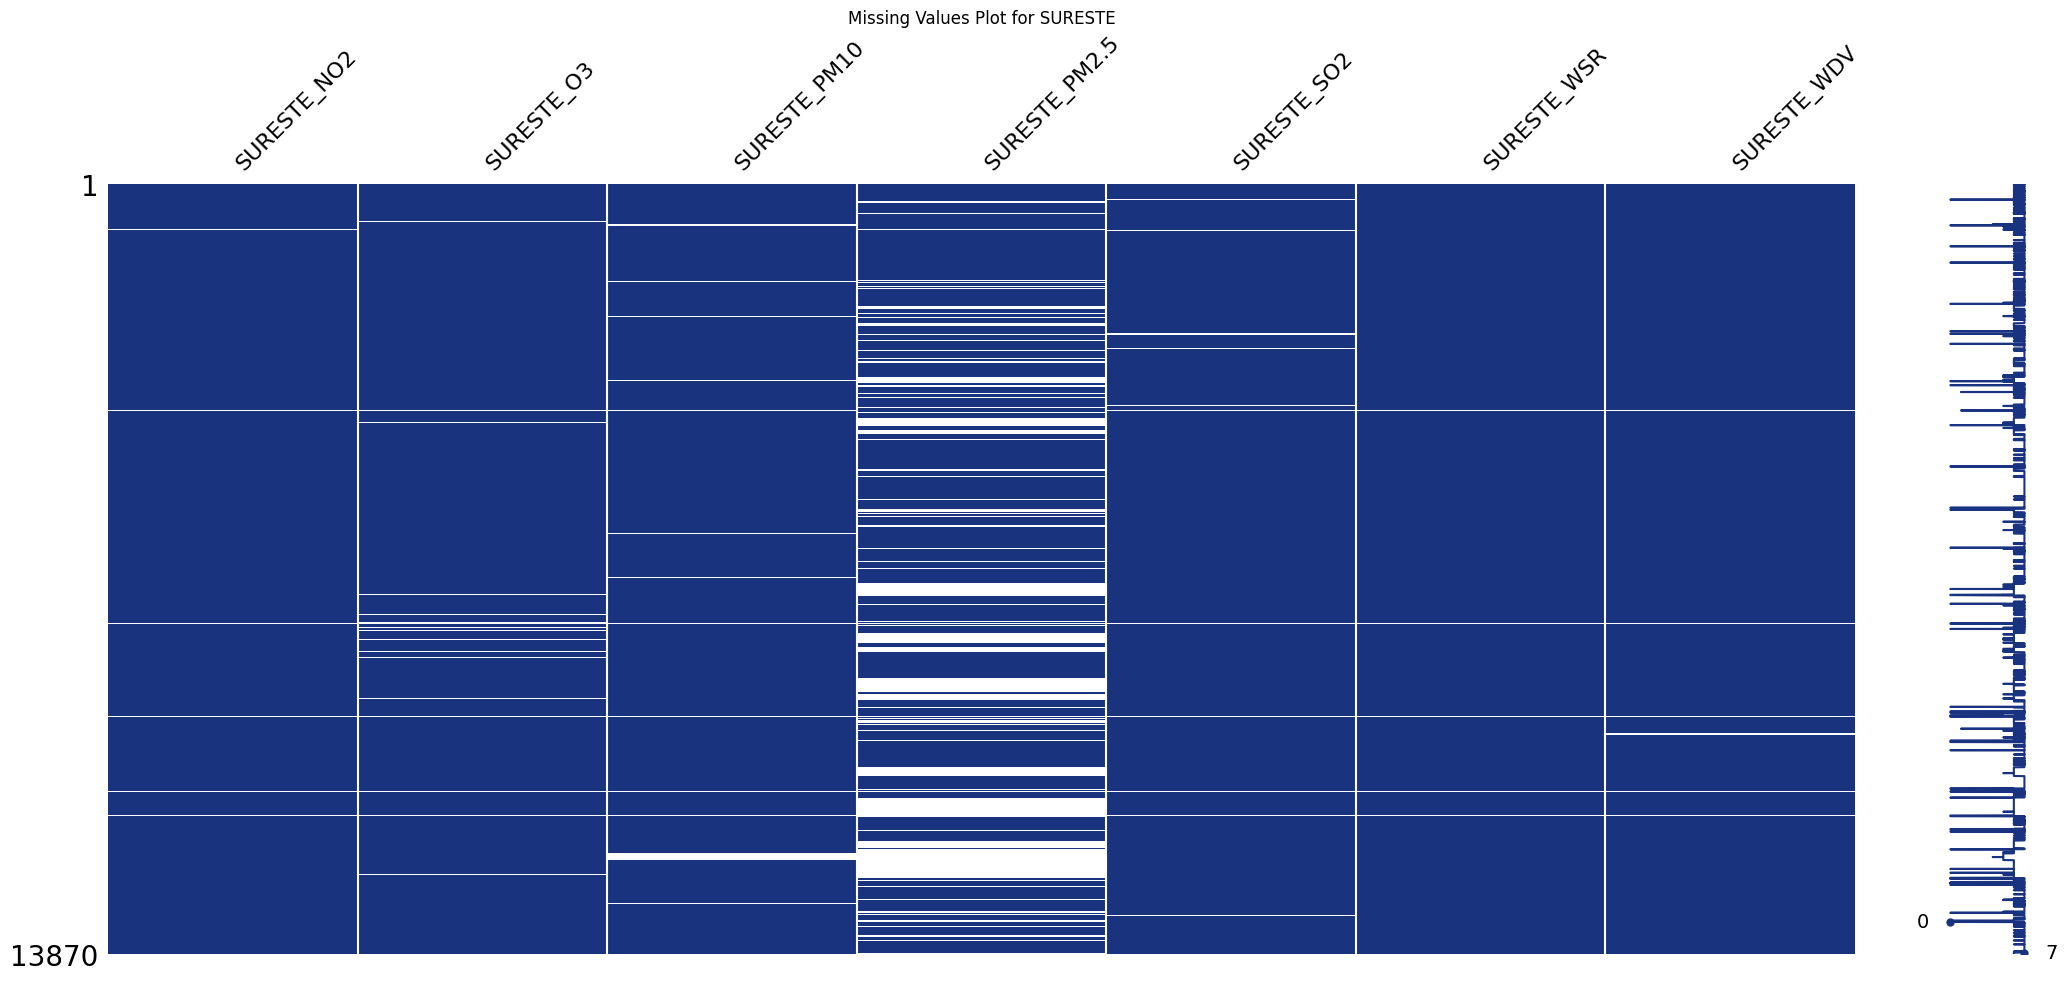

<Figure size 1200x600 with 0 Axes>

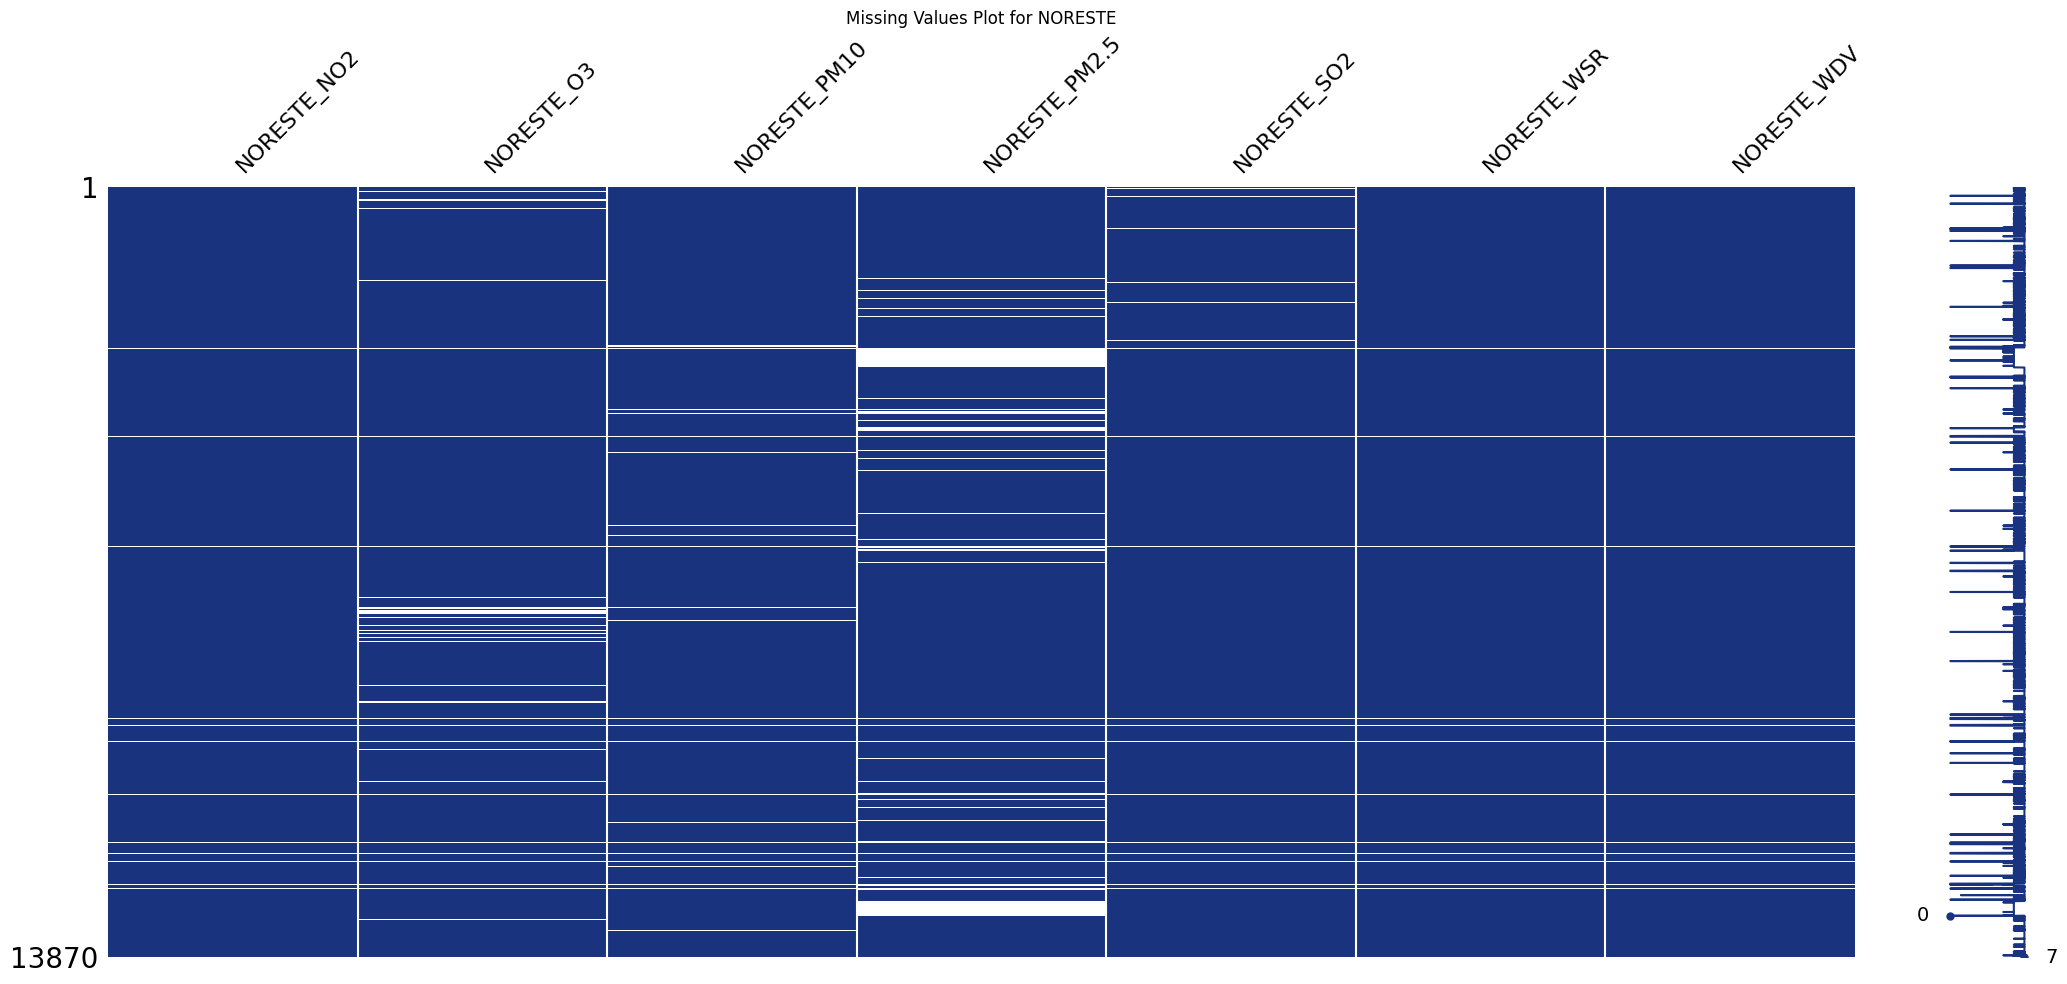

<Figure size 1200x600 with 0 Axes>

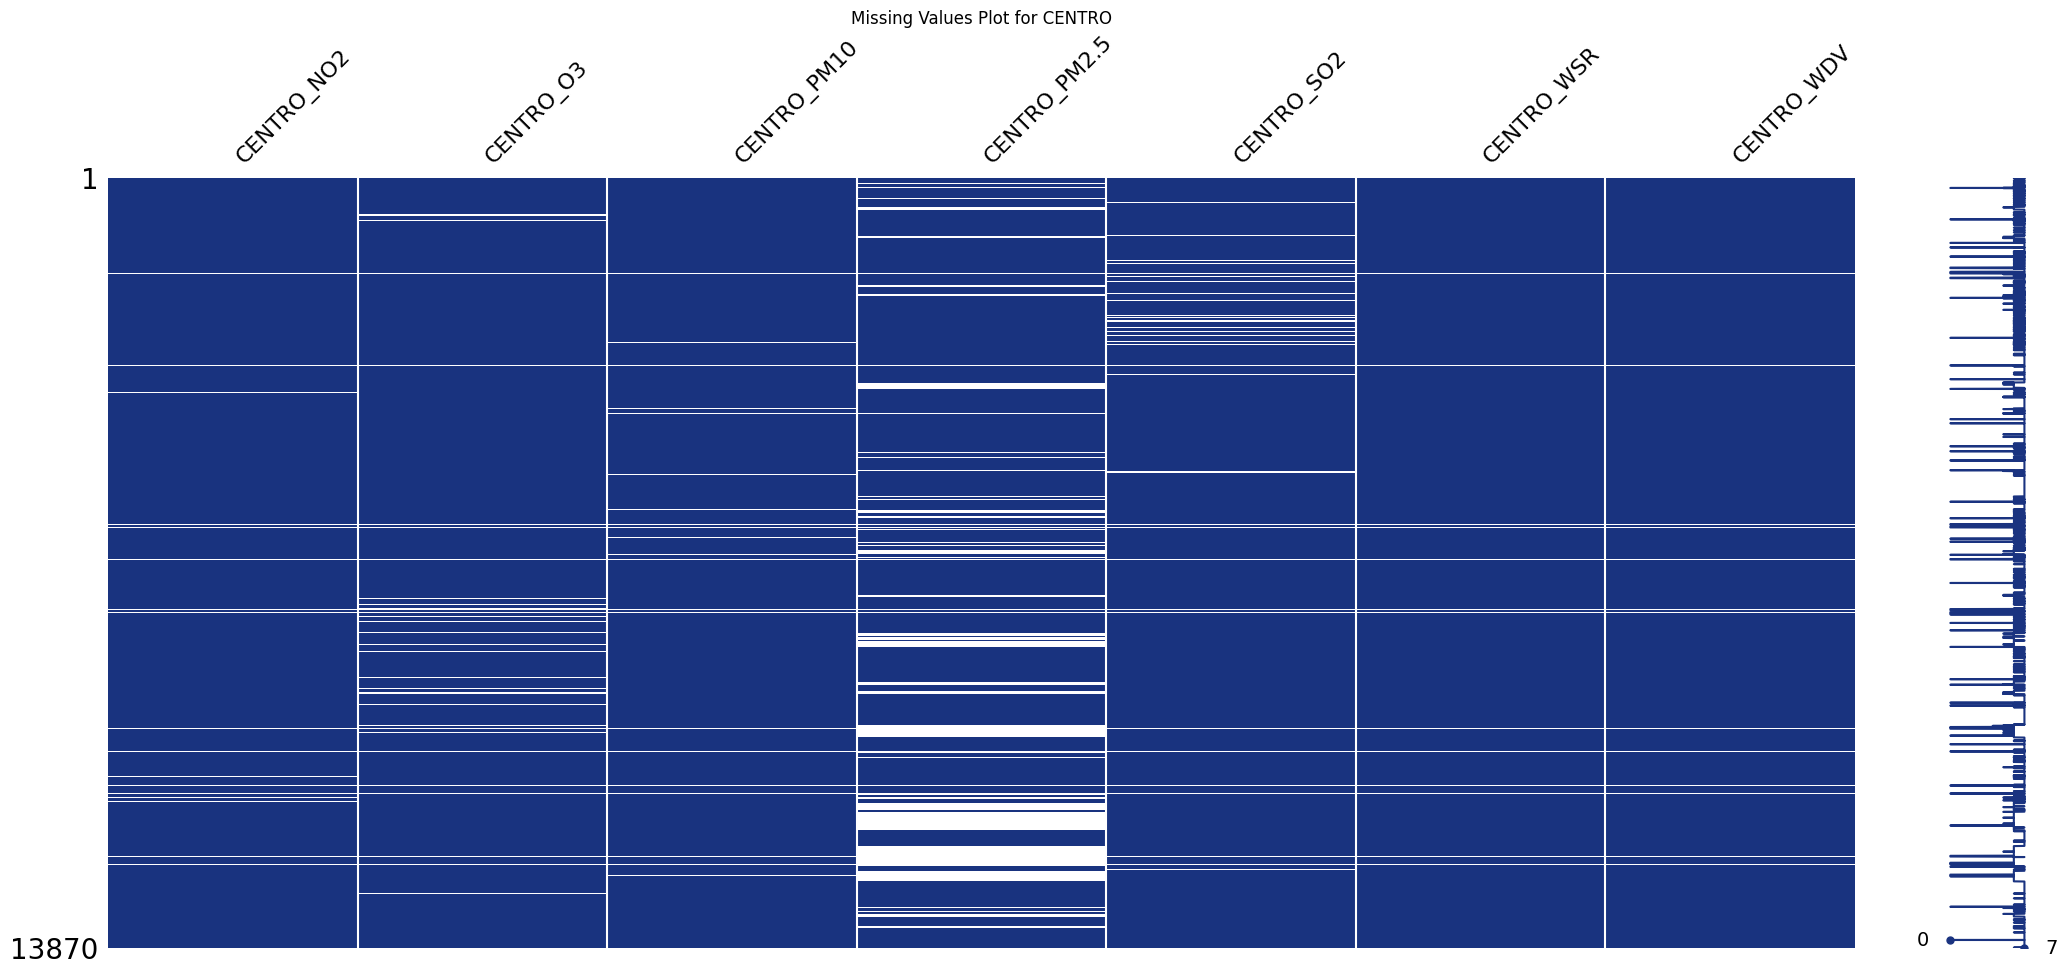

<Figure size 1200x600 with 0 Axes>

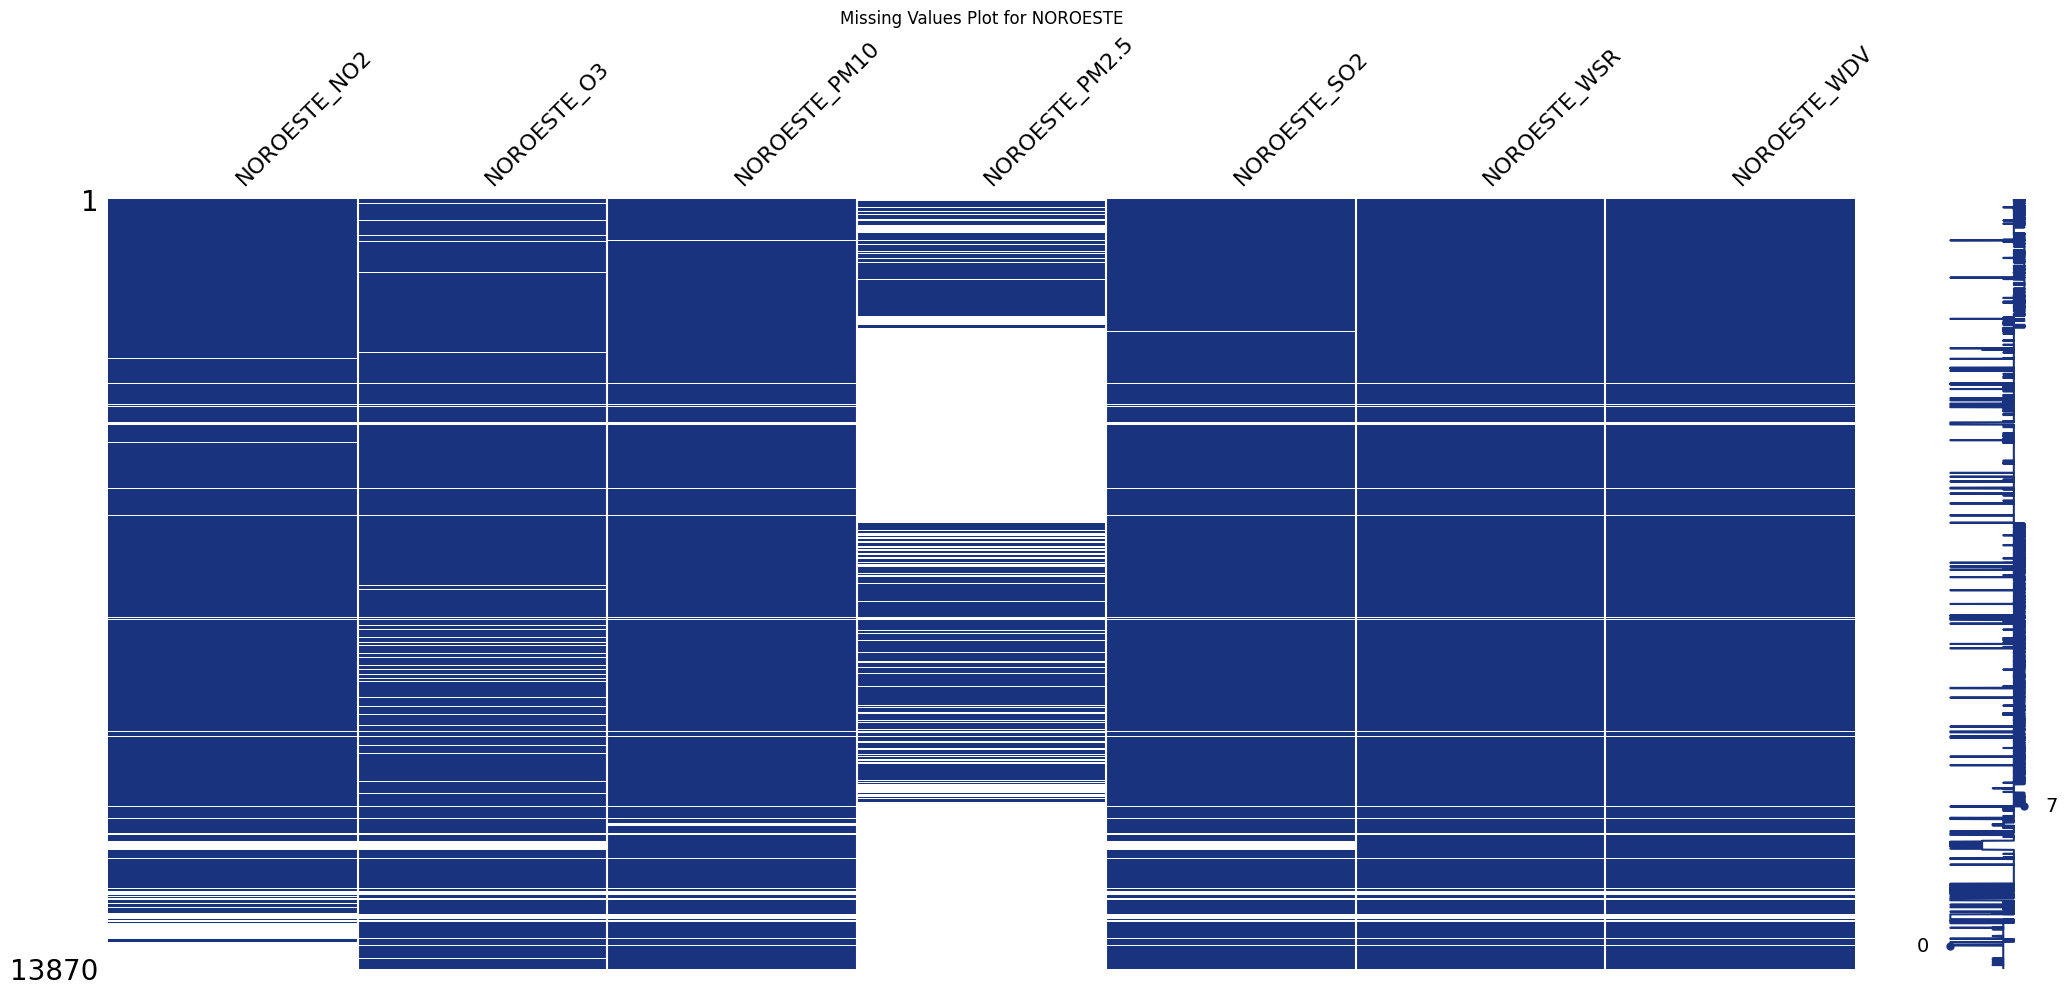

<Figure size 1200x600 with 0 Axes>

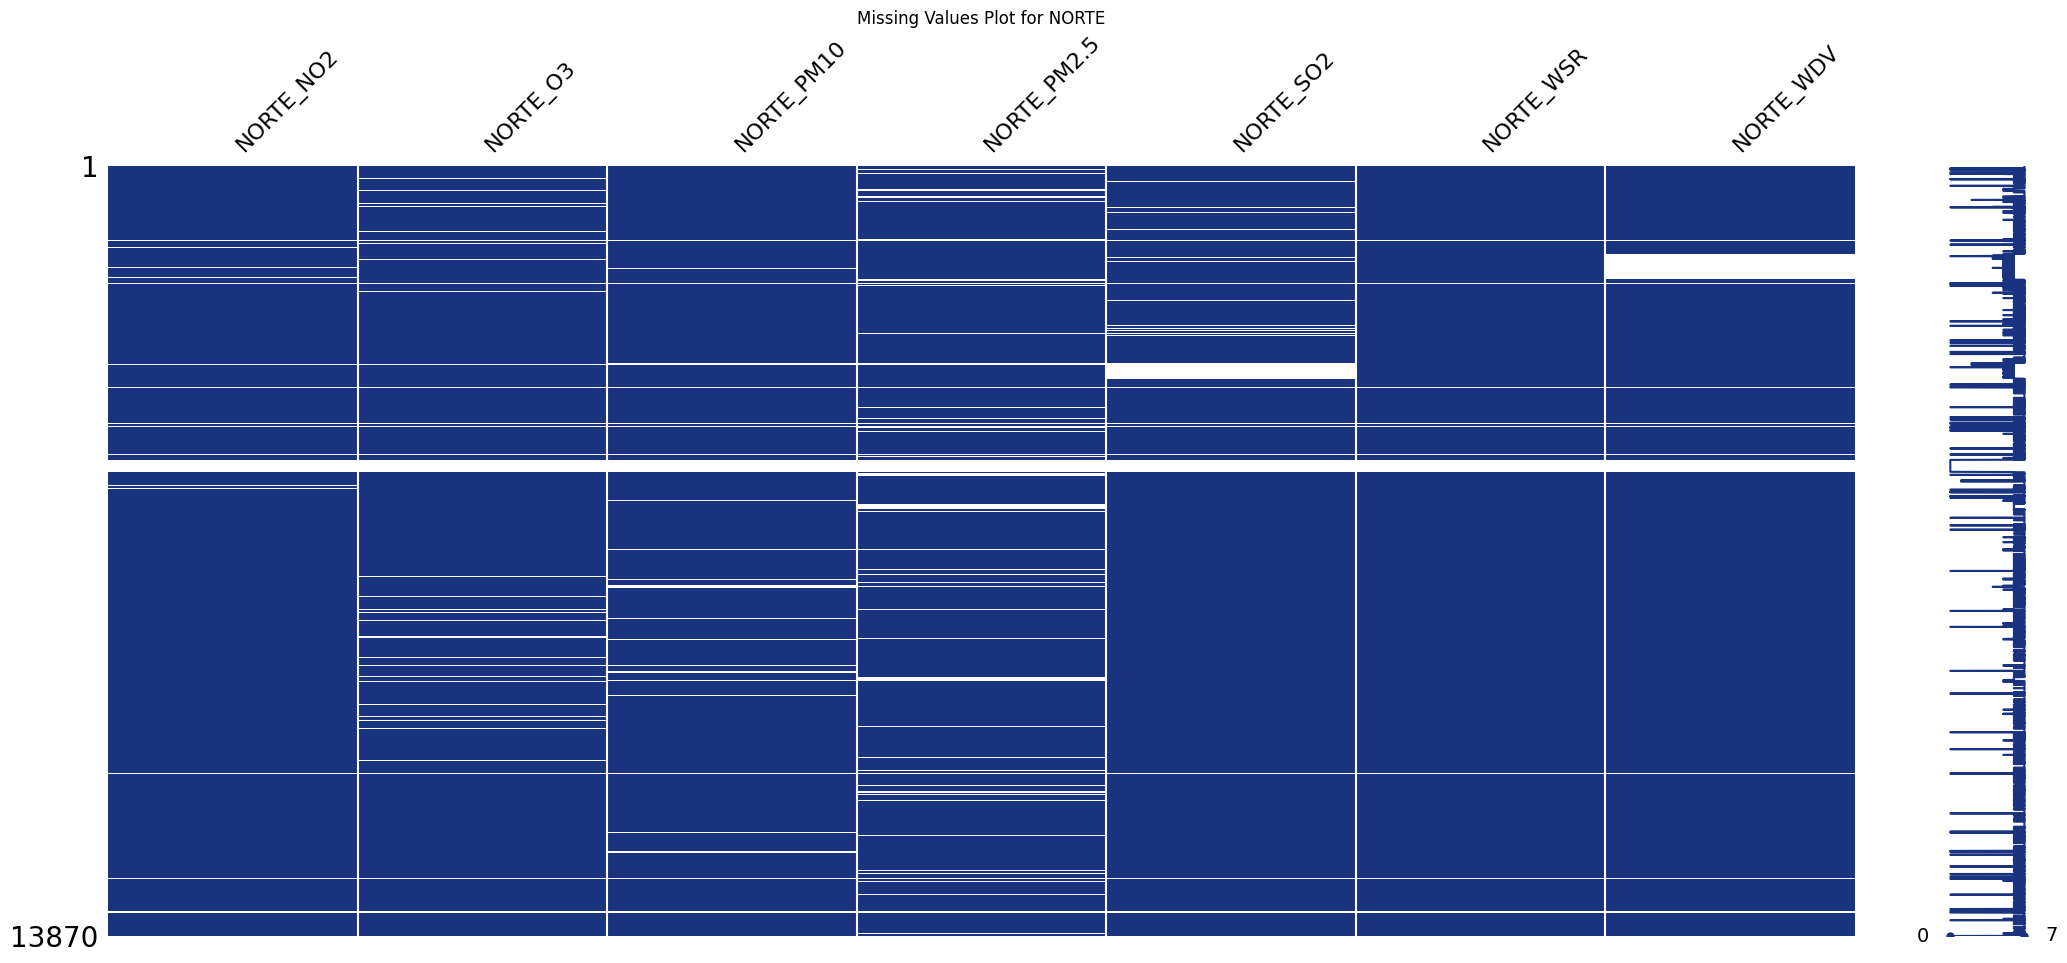

<Figure size 1200x600 with 0 Axes>

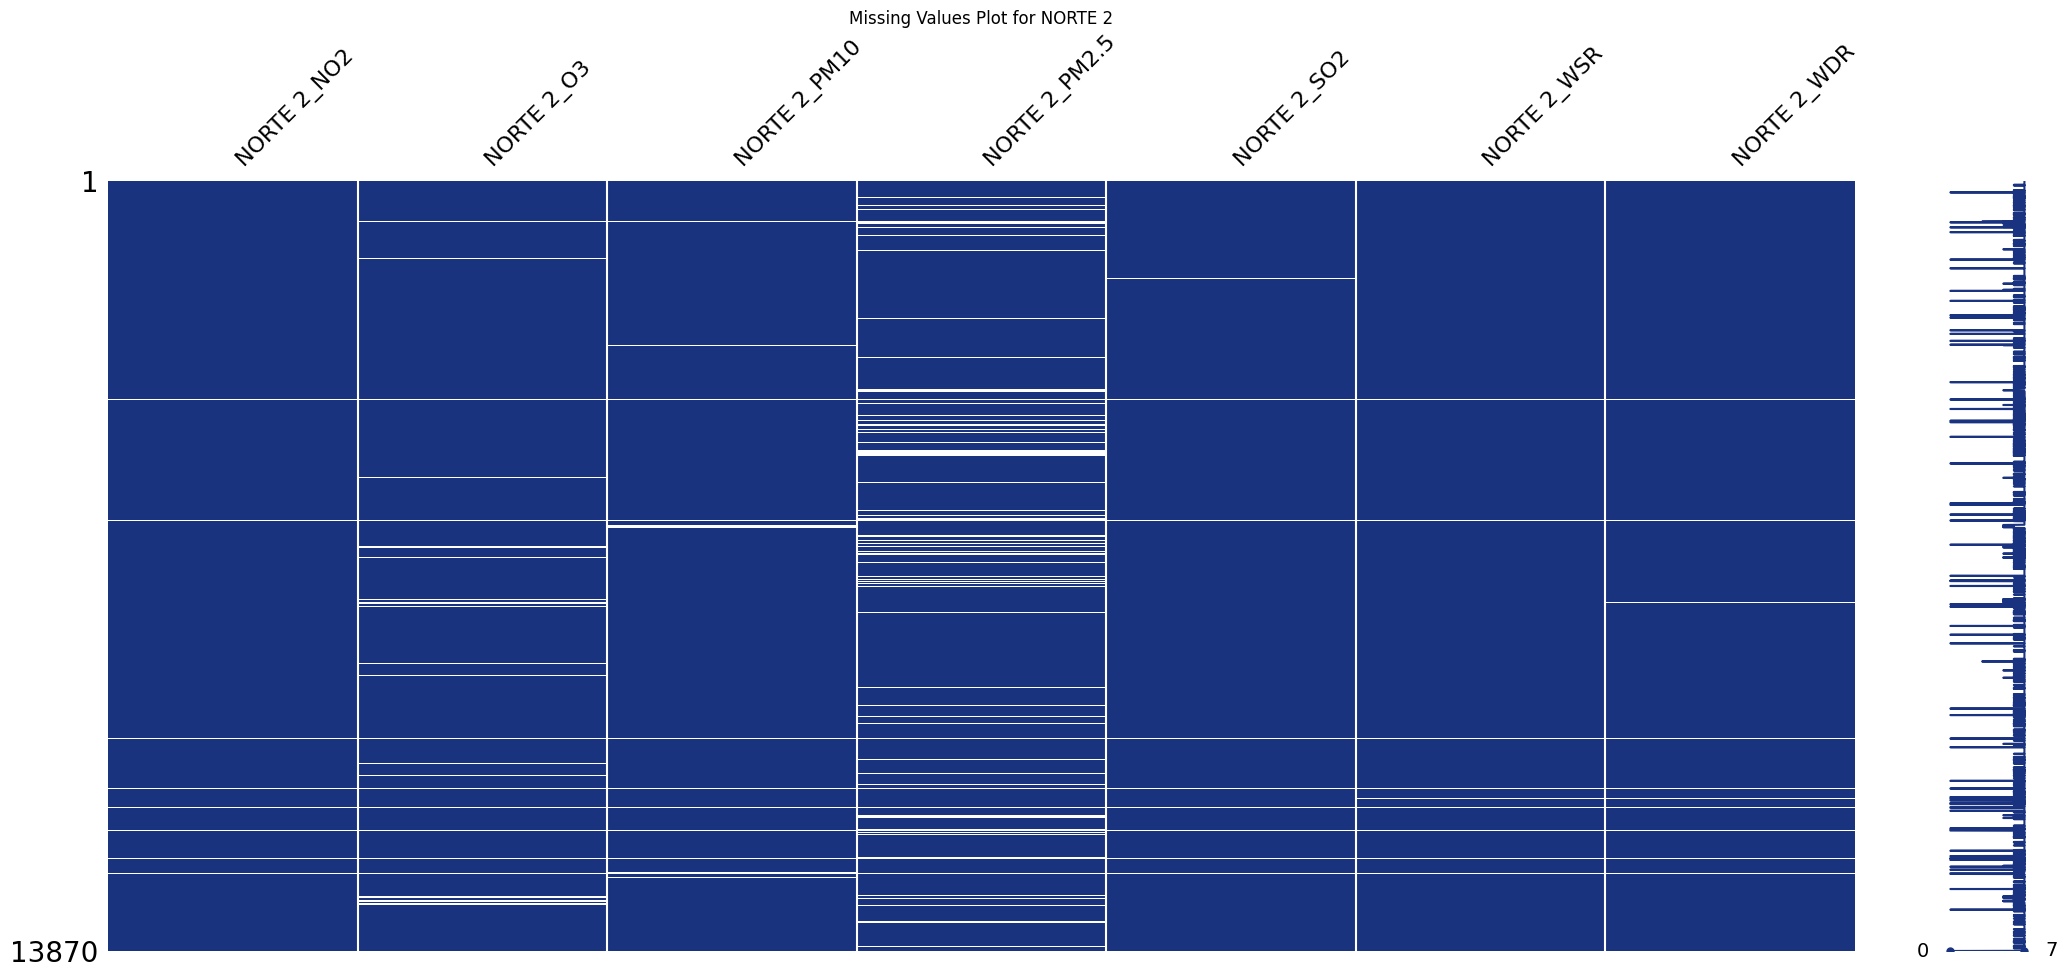

In [26]:
import missingno as msno
import matplotlib.pyplot as plt

# Flatten the multi-level columns to create a single-level index for missingno
df_flattened = df.copy()
df_flattened.columns = ['_'.join(col) for col in df.columns]

# Plot the missing values for each group based on the first header
unique_groups = df.columns.get_level_values(0).unique()

for group in unique_groups:
    # Select columns for the current group
    group_cols = [col for col in df.columns if col[0] == group]
    group_df = df[group_cols]

    # Flatten the columns for missingno
    group_df_flattened = group_df.copy()
    group_df_flattened.columns = ['_'.join(col) for col in group_df.columns]

    # Plot the missing values matrix for the current group
    plt.figure(figsize=(12, 6))
    msno.matrix(group_df_flattened, color=[0.1, 0.2, 0.5])
    plt.title(f'Missing Values Plot for {group}')
    plt.show()


Con esta herramienta gráfica se puede observar que la mayor parte de los datos nulos se encuentran en las mediciones de 'pm 2.5' siendo el caso más grave la estación NOROESTE, seguido por las mediciones de Ozono (O3) en los datos.<br>
En vista de la gran cantidad de datos faltantes para la estación NOROESTE se ha decidio eliminarla del set de datos que se trabajará así como las partículas 'pm 2.5', esto con el objetivo de evitar la imputación de datos.

In [27]:
to_remove=["NOROESTE", "PM2.5"]
cols = df.columns.to_flat_index()
filtered_cols= [col for col in cols if col[0] not in to_remove]
df=df.loc[:,pd.MultiIndex.from_tuples(filtered_cols)]
cols = df.columns.to_flat_index()
filtered_cols= [col for col in cols if col[1] not in to_remove]
df=df.loc[:,pd.MultiIndex.from_tuples(filtered_cols)]
df.columns

MultiIndex([('SURESTE',  'NO2'),
            ('SURESTE',   'O3'),
            ('SURESTE', 'PM10'),
            ('SURESTE',  'SO2'),
            ('SURESTE',  'WSR'),
            ('SURESTE',  'WDV'),
            ('NORESTE',  'NO2'),
            ('NORESTE',   'O3'),
            ('NORESTE', 'PM10'),
            ('NORESTE',  'SO2'),
            ('NORESTE',  'WSR'),
            ('NORESTE',  'WDV'),
            ( 'CENTRO',  'NO2'),
            ( 'CENTRO',   'O3'),
            ( 'CENTRO', 'PM10'),
            ( 'CENTRO',  'SO2'),
            ( 'CENTRO',  'WSR'),
            ( 'CENTRO',  'WDV'),
            (  'NORTE',  'NO2'),
            (  'NORTE',   'O3'),
            (  'NORTE', 'PM10'),
            (  'NORTE',  'SO2'),
            (  'NORTE',  'WSR'),
            (  'NORTE',  'WDV'),
            ('NORTE 2',  'NO2'),
            ('NORTE 2',   'O3'),
            ('NORTE 2', 'PM10'),
            ('NORTE 2',  'SO2'),
            ('NORTE 2',  'WSR'),
            ('NORTE 2',  'WDR')],
         

Se propone una eliminación de toda observación que cuente con algún tipo de dato nulo para observar cuántos datos utilizables quedan en el dataset

In [28]:
print(df.shape)
df_cleaned = df.dropna()
df_cleaned.shape

(13870, 30)


(9559, 30)

In [29]:
null_values = df_cleaned.isnull().sum()
print(null_values)

SURESTE  NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDV     0
NORESTE  NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDV     0
CENTRO   NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDV     0
NORTE    NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDV     0
NORTE 2  NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDR     0
dtype: int64


## Interpolación

Nótese que, en caso de eliminar entradas con datos nulos, estas dejarían huecos que podrían ser importantes para la serie de tiempo que describen. Por ello se considera que la mejor alternativa es inputar y, para agilizar el proceso sin comprometer la calidad, se propone una inputación por interpolación utilizando las funciones incluidas en Pandas.

In [30]:
df_interpolated = df.interpolate(method='linear')

In [31]:
# Comprobar que ya no hay datos nulos
null_values= df_interpolated.isnull().sum()
print(null_values)

SURESTE  NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDV     0
NORESTE  NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDV     0
CENTRO   NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDV     0
NORTE    NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDV     0
NORTE 2  NO2     0
         O3      0
         PM10    0
         SO2     0
         WSR     0
         WDR     0
dtype: int64


In [32]:
# Eliminar los pocos nulos que quedaron y guardar la db
df_cleaned = df_interpolated.dropna()

## Rangos de Valores

In [33]:
negative_values = (df_cleaned < 0).sum()
print("\nNegative Values in DataFrame:")
print(negative_values[negative_values > 0])


Negative Values in DataFrame:
Series([], dtype: int64)


In [34]:
df_cleaned.describe()

SURESTE                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13870.000000  13870.000000  13870.000000  13870.000000  13870.000000   
mean      13.795908     28.492790     52.446948      3.411492     10.136734   
std        9.441434     18.324029     37.018415      1.824003      5.281862   
min        1.100000      2.000000      2.000000      0.500000      0.300000   
25%        6.700000     15.000000     28.000000      2.400000      5.700000   
50%       11.400000     26.000000     45.000000      3.100000      9.500000   
75%       18.400000     38.000000     68.000000      3.800000     14.200000   
max       77.400000    163.000000    800.000000     39.200000     31.200000   

                          NORESTE                                            \
                WDV           NO2            O3          PM10           SO2   
count  13870.000000  13870.000000  13870.000000  13870.000000  13870.000000   
mean     138.308291     14.853508     28.123756     66.643221      3.875880   
std       84.043251      9.679910     16.594674     52.937190      2.518853   
min        1.000000      0.500000      1.000000      2.000000      0.800000   
25%       88.000000      8.200000     16.000000     40.142157      2.766667   
50%      109.000000     11.800000     25.000000     56.000000      3.400000   
75%      170.000000     18.500000     37.000000     78.000000      4.200000   
max      360.000000     80.400000    155.000000   1000.000000    111.800000   

       ...         NORTE                                            \
       ...          PM10           SO2           WSR           WDV   
count  ...  13870.000000  13870.000000  13870.000000  13870.000000   
mean   ...     63.320359      3.148688      7.589578     93.655047   
std    ...     46.226897      1.881359      4.185859     85.874313   
min    ...      2.000000      0.500000      0.100000      1.000000   
25%    ...     34.000000      2.200000      4.400000     21.009847   
50%    ...     52.000000      2.800000      6.900000     72.000000   
75%    ...     78.000000      3.687411     10.300000    141.000000   
max    ...    712.000000     59.000000     27.400000    360.000000   

            NORTE 2                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13870.000000  13870.000000  13870.000000  13870.000000  13870.000000   
mean      23.706510     26.728947     66.317051      4.066471      7.632725   
std       11.382177     17.363726     44.246744      2.245962      3.305689   
min        0.400000      1.000000      2.000000      1.200000      0.100000   
25%       15.200000     14.000000     39.000000      2.900000      5.400000   
50%       21.500000     22.000000     58.000000      3.400000      7.300000   
75%       29.500000     35.000000     82.000000      4.400000      9.500000   
max      126.000000    163.000000    705.000000     69.600000     27.700000   

                     
                WDR  
count  13870.000000  
mean      99.421125  
std       89.429733  
min        1.000000  
25%       42.000000  
50%       78.000000  
75%      105.000000  
max      360.000000  

[8 rows x 30 columns]

La normativa que regula y etiqueta la distribución de contaminantes describe las concentraciones de NO2, O3 y SO2 en partóculas por millón (PPM) en vez de partículas por billón (PPB) por esto se propone hacer el cambio de unidades, de esta manera el comparativo para encontrar datos erroneos puede realizarse de manera directa

In [35]:
headers_to_divide = ["NO2", "O3", "SO2"]

for col in df_cleaned.columns:
    group, col_name = col
    if col_name in headers_to_divide:
        df_cleaned[col] = df_cleaned[col] / 1000

df_cleaned.describe()


SURESTE                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13870.000000  13870.000000  13870.000000  13870.000000  13870.000000   
mean       0.013796      0.028493     52.446948      0.003411     10.136734   
std        0.009441      0.018324     37.018415      0.001824      5.281862   
min        0.001100      0.002000      2.000000      0.000500      0.300000   
25%        0.006700      0.015000     28.000000      0.002400      5.700000   
50%        0.011400      0.026000     45.000000      0.003100      9.500000   
75%        0.018400      0.038000     68.000000      0.003800     14.200000   
max        0.077400      0.163000    800.000000      0.039200     31.200000   

                          NORESTE                                            \
                WDV           NO2            O3          PM10           SO2   
count  13870.000000  13870.000000  13870.000000  13870.000000  13870.000000   
mean     138.308291      0.014854      0.028124     66.643221      0.003876   
std       84.043251      0.009680      0.016595     52.937190      0.002519   
min        1.000000      0.000500      0.001000      2.000000      0.000800   
25%       88.000000      0.008200      0.016000     40.142157      0.002767   
50%      109.000000      0.011800      0.025000     56.000000      0.003400   
75%      170.000000      0.018500      0.037000     78.000000      0.004200   
max      360.000000      0.080400      0.155000   1000.000000      0.111800   

       ...         NORTE                                            \
       ...          PM10           SO2           WSR           WDV   
count  ...  13870.000000  13870.000000  13870.000000  13870.000000   
mean   ...     63.320359      0.003149      7.589578     93.655047   
std    ...     46.226897      0.001881      4.185859     85.874313   
min    ...      2.000000      0.000500      0.100000      1.000000   
25%    ...     34.000000      0.002200      4.400000     21.009847   
50%    ...     52.000000      0.002800      6.900000     72.000000   
75%    ...     78.000000      0.003687     10.300000    141.000000   
max    ...    712.000000      0.059000     27.400000    360.000000   

            NORTE 2                                                          \
                NO2            O3          PM10           SO2           WSR   
count  13870.000000  13870.000000  13870.000000  13870.000000  13870.000000   
mean       0.023707      0.026729     66.317051      0.004066      7.632725   
std        0.011382      0.017364     44.246744      0.002246      3.305689   
min        0.000400      0.001000      2.000000      0.001200      0.100000   
25%        0.015200      0.014000     39.000000      0.002900      5.400000   
50%        0.021500      0.022000     58.000000      0.003400      7.300000   
75%        0.029500      0.035000     82.000000      0.004400      9.500000   
max        0.126000      0.163000    705.000000      0.069600     27.700000   

                     
                WDR  
count  13870.000000  
mean      99.421125  
std       89.429733  
min        1.000000  
25%       42.000000  
50%       78.000000  
75%      105.000000  
max      360.000000  

[8 rows x 30 columns]

In [36]:
df_cleaned.shape

(13870, 30)

In [37]:
def remove_above_thresholds(df, thresholds):
    df_copy = df.copy()
    for col in df.columns:
        group, col_name = col
        if col_name in thresholds:
            threshold = thresholds[col_name]
            df_copy = df_copy[df_copy[col] <= threshold]

    return df_copy
thresholds = {
    'NO2': 0.3,
    'O3': 0.2,
    'PM10': 900,
    'SO2': 0.6,
    'WSR': 45,
    'WDV': 360
}

# Apply the function to remove observations above the thresholds
df_filtered = remove_above_thresholds(df_cleaned, thresholds)

# Display the filtered DataFrame
print(df_filtered)


                    SURESTE                                       NORESTE  \
                        NO2        O3   PM10     SO2   WSR    WDV     NO2   
2023-01-01 00:00:00  0.0326  0.003000  110.0  0.0035   3.2  257.0  0.0430   
2023-01-01 01:00:00  0.0303  0.003000  116.0  0.0034   3.3  278.0  0.0444   
2023-01-01 02:00:00  0.0288  0.003000  117.0  0.0036   3.7  278.0  0.0415   
2023-01-01 03:00:00  0.0291  0.003000  135.0  0.0038   3.6  197.0  0.0423   
2023-01-01 04:00:00  0.0257  0.003333  132.0  0.0036   4.9  271.0  0.0399   
...                     ...       ...    ...     ...   ...    ...     ...   
2024-07-31 19:00:00  0.0043  0.026000   88.0  0.0023  20.3  147.0  0.0060   
2024-07-31 20:00:00  0.0045  0.024000   94.0  0.0022  17.1  147.0  0.0075   
2024-07-31 21:00:00  0.0039  0.024000   83.0  0.0021  19.8  143.0  0.0090   
2024-07-31 22:00:00  0.0039  0.023000   95.0  0.0020  21.4  129.0  0.0097   
2024-07-31 23:00:00  0.0048  0.020000  103.0  0.0020  20.9  108.0  0.0090   

In [38]:
print("Dataset shape: ")
df_filtered.shape

Dataset shape: 


(13863, 30)

En total se eliminaron 6 registros que contaban con rangos erróneos sobre las mediciones.
Habiendo realizado las siguientes tareas se exporta el archivo de datos:


*   Dimensión original del dataset
*   Descrición de variables
*   Verificación de la calidad de los datos: Valores faltantes y valores erróneos
*   Definición del conjunto de datos a utilizar
*   Eliminación de datos faltantes y erroneos

Falta realizar las siguientes tareas:
*   Manejo de datos duplicados, y atípicos en el dataset
*   Analizar la conveniencia de realizar transformacions en los datos
*   Analizar al conveniencia de construir atributos derivados
*   Realizar el informe sobre la presentación de datos



In [39]:
df_filtered.to_csv("Output/HalfProcessedDataset.csv")